(guinier_porod_model)=
# Guinier-Porod Model

* [2010, B. Hammouda; A new Guinier-Porod model](https://journals.iucr.org/paper?ce5078)
* caveat: this model is only for tutorials, meaning not realistic as a protein model due to the lack of medium angle regions 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def guinier_porod(q, G, Rg, d, return_also_q1=False):
    q1 = 1/Rg*np.power(3*d/2, 1/2)
    D = G * np.exp(-q1**2 * Rg**2/3) * q1**d
    lower = q <= q1
    qlow = q[lower]
    qhigh = q[np.logical_not(lower)]
    low_angle_values = G * np.exp(-qlow**2*Rg**2/3)
    high_angle_values = D/qhigh**d
    w = np.concatenate([low_angle_values, high_angle_values])
    if return_also_q1:
        return w, q1
    else:
        return w

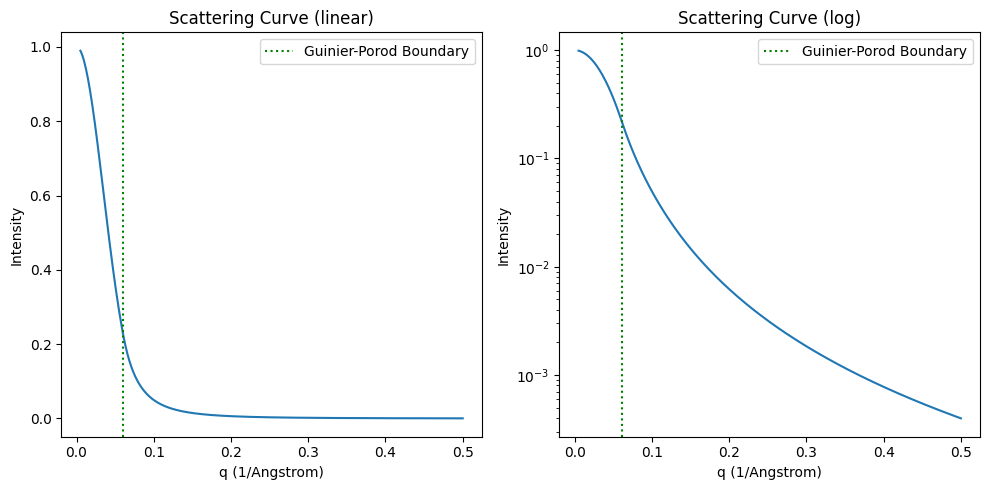

In [5]:
q = np.linspace(0.005, 0.5, 400)
G = 1
Rg = 35
d = 3
I, q1 = guinier_porod(q, G, Rg, d, return_also_q1=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax2.set_yscale('log')

for ax, yscale in ((ax1, 'linear'), (ax2, 'log')):
    ax.set_xlabel("q (1/Angstrom)")
    ax.set_ylabel("Intensity")
    ax.set_title(f"Scattering Curve ({yscale})")
    ax.plot(q, I)
    ax.axvline(q1, linestyle=':', color="green", label='Guinier-Porod Boundary')
    ax.legend()

fig.tight_layout()